In [1]:
# run the blocks in serial order
import matplotlib.pyplot as plt
import csv
from operator import add
import random
import numpy as np
import matplotlib

In [2]:
def distance(a,b):
    d = 0
    for i in range(len(a)):
        d += (a[i]-b[i])**2
    return d

In [3]:
def equals(arr1, arr2):
    for i in range(len(arr1)):
        for j in range(len(arr1[0])):
            if(arr1[i][j]!=arr2[i][j]):
                return False
    return True

In [4]:
def kmeans(k, dataset, maxIterations=60):
    length = len(dataset)
    dimension = len(dataset[0])
    krands = [0 for y in range(k)]
    visited =[False for x in range(length)]
    count = 0
    while(count<k):
        n = random.randint(0,length)
        if(visited[n]==False):
            krands[count] = n
            visited[n] = True
            count += 1
    prev_cluster_centers = [[-1 for x in range(dimension)] for y in range(k)]
    cluster_centers = [[0 for x in range(dimension)] for y in range(k)]
    for i in range(k):
        cluster_centers[i] = dataset[krands[i]]
    cluster_proximity = [-1 for i in range (length)]
    iteration = 0
    while(equals(cluster_centers, prev_cluster_centers)==False and iteration<maxIterations):
        iteration+=1
        print(iteration,)
        for i in range(k):
            for j in range(dimension):
                prev_cluster_centers[i][j] = cluster_centers[i][j]
        for i in range(length):
            mn = float("inf")
            ind = -1
            for j in range(k):
                d = distance(dataset[i],cluster_centers[j])
                if(mn>d):
                    mn = d
                    ind = j
            cluster_proximity[i] = ind
        for i in range(k):
            c = 0
            cluster_centers[i] = [0] * dimension
            for j in range(length):
                if(cluster_proximity[j]==i):
                    cluster_centers[i] = list(map(add,cluster_centers[i],dataset[j]))
                    c+=1
            for j in range(dimension):
                cluster_centers[i][j]/=c
    return cluster_proximity
    

In [5]:
# necessary when running the code in google colab
# from google.colab import drive
# drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [7]:
# UCI ML 3d-spatial-network data set
# https://archive.ics.uci.edu/ml/datasets/3D+Road+Network+%28North+Jutland%2C+Denmark%29

f = './3D_spatial_network.csv'
data = csv.reader(open(f))

li = []
for line in data:
    li.append(list(map(float,line)))
d = [[s[3]] for s in li]  # actual attribute to be used for clustering
# uncomment the code below to normalize the data, not necessary here
# l = len(li)
# mean = [0 for i in range(l)]
# sd = [0 for i in range(l)]
# for i in range(l):
#     for j in range(len(li[i])):
#         mean[j] += li[i][j]
#         sd[j] += li[i][j]**2
# for i in range(len(li[0])):
#     mean[i]/=l
#     sd[i] = (sd[i]/l - mean[i]**2)**0.5
# for i in range(l):
#     for j in range(len(li[i])):
#         li[i][j] = (li[i][j]-mean[j])/sd[j]

        
labels = kmeans(4,d)

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60


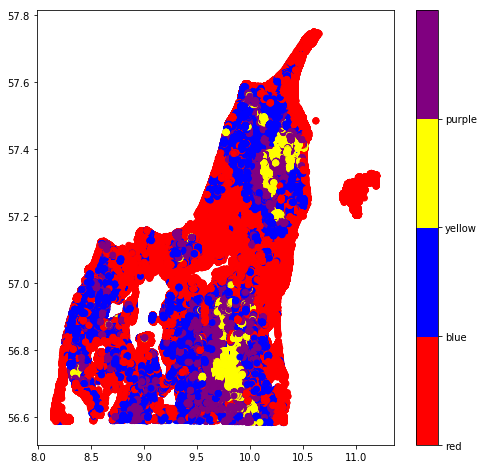

In [8]:
colors = ['red','blue','yellow','purple']
x = [s[1] for s in li]
y = [s[2] for s in li]
fig = plt.figure(figsize=(8,8))
plt.scatter(x,y, c=labels, cmap=matplotlib.colors.ListedColormap(colors))
cb = plt.colorbar()
loc = np.arange(0,max(labels),max(labels)/float(len(colors)))
cb.set_ticks(loc)
cb.set_ticklabels(colors)

In the above picture, the road map of denmark is separated into four clusters. The parts in the map with same colour are similar in altitude. This information can be used to easier cycling routes. By increasing the number of clusters, we can get more 

In [5]:
# Synthetic data set
#http://cs.joensuu.fi/sipu/datasets/

fname = './s1.txt'
with open(fname) as f:
    content = f.readlines()
content = [x.strip().split('    ') for x in content] 
content = [[int(y) for y in x] for x in content ]
li = content
#uncomment the code below to normalize the data
# l = len(li)
# mean = [0 for i in range(l)]
# sd = [0 for i in range(l)]
# for i in range(l):
#     for j in range(len(li[i])):
#         mean[j] += li[i][j]
#         sd[j] += li[i][j]**2
# for i in range(len(li[0])):
#     mean[i]/=l
#     sd[i] = (sd[i]/l - mean[i]**2)**0.5
# for i in range(l):
#     for j in range(len(li[i])):
#         li[i][j] = (li[i][j]-mean[j])/sd[j]
labels = kmeans(15,li)


1
2
3
4
5
6
7
8
9
10
11
12
13


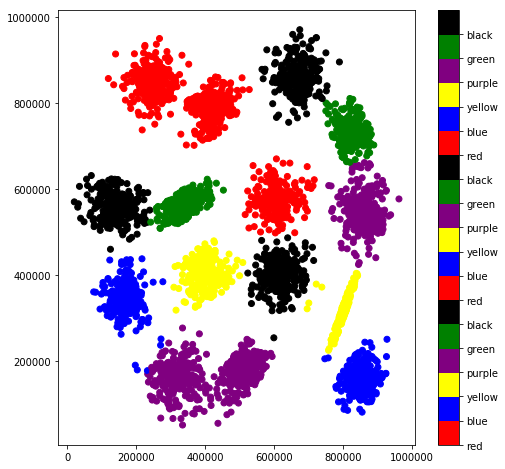

In [6]:
colors = ['red','blue','yellow','purple','green','black','red','blue','yellow','purple','green','black','red','blue','yellow','purple','green','black']
x = [s[0] for s in li]
y = [s[1] for s in li]
fig = plt.figure(figsize=(8,8))
plt.scatter(x,y, c=labels, cmap=matplotlib.colors.ListedColormap(colors))
cb = plt.colorbar()
loc = np.arange(0,max(labels),max(labels)/float(len(colors)))
cb.set_ticks(loc)
cb.set_ticklabels(colors)